## Phase 3

Due Date: Sunday, March 21 at 11:59 pm (No late submissions, even 11:59:01 PM will get 0 scores). Each person needs to have submissions.
Example for answering:
In Section 6 on the template, we provide a brief example of the k-means algorithm. Please take a look.
Submission guideline:
1. write your code and report in this notebook.
2. save this notebook as <person1ubname_person2ubname.ipynb>.
3. save your raw data and cleaned data in the data folder.
4. save the notebook file with a data folder named <person1ubname_person2ubname.zip>. (we will not grade files with other compression methods such as rar)
5. upload your zip file to the ub learns.


### Header
#### Course Name: 
**Data Intensive Computing**
#### phase #: 
**3**
#### term project name: 
**Spotify API: Is it the Key to Commercial Success?**

### Q Write down the following information: 
#### 1. Problem Statement: 

**Context:** Spotify is one of the world's most popular music streaming services. It's home to 50 million songs, with tens of thousands more added every day. For artists in this age, it is critical that they host their music on the platform. The listener count on a track is highly indicative of a commercially successful piece of music. Spotify has its own curated playlists (assembled by genre and music experts) that are advertised to all users. This promotion drives listens, leading to an increase in exposure and revenue for artists/labels whose music is featured on one of these coveted playlists.  

**API:** Spotify's API allows for anyone to extract information about Spotify's uploads. Many interesting features that are produced by their proprietary track analysis are available to the public. 

**Project:** This project takes tracks from the top 150 curated playlists posted by Spotify's own account, using their API, to begin to understand what makes a track worthy of promotion by the very platform it is hosted on. What makes a track "good" enough to be backed by genre experts and put in a position to reach many new sets of fresh ears?
 * What are the commonalities between listed tracks?  
 * What kind of tracks are rated more "popular" and what other features are correlated with popularity?  
 * What can artists/labels take away from the available data to give themselves a competing edge on getting listed by a curator? 
 * Is it possible to predict the optimal track features for commercial success?



#### 2. Hypothesis:
   + hypothesis 1: Popular tracks will have higher valence, energy, and/or danceability during Summer months.  
   + hypothesis 2: Artists will get good information from popular (60-100)/(80-100) AND less popular tracks. Sometimes "good" tracks aren't popular, but get on these curated lists because they are discovered.
   + hypothesis 3: Spotify's abundance of features (post-cleaning) may muddy our data and result in overfitting.

#### 3 Cleaned Datasets
Display the cleaned dataset after phase 1


In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sb
import matplotlib.pyplot as plt
# import your cleaned dataset
df = pd.read_csv('phase2spotify_cleaned.csv')
# Must convert back to datetime after csv import.
df['release_date'] = df['release_date'].astype('datetime64[D]')
# Must delete Unnamed: 0 column which is automatically appended upon export of csv.
df = df.drop(columns=['Unnamed: 0'])


# display the first five rows data.head(5)
df.head(5)

release_date  length  popularity  valence  ...   key  tempo  mode  fromAlbum
0   2020-03-20  215626        96.0    0.644  ...   0.0    118   1.0          1
1   2021-02-11  165506        86.0    0.590  ...   6.0    134   1.0          1
2   2021-01-06  132780        92.0    0.472  ...   4.0    150   0.0          0
3   2021-01-15  162802        89.0    0.808  ...   1.0    125   1.0          0
4   2020-08-07  238805        82.0    0.531  ...  11.0     81   1.0          1

[5 rows x 15 columns]

In [2]:
# Train Test Split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df)
print(len(train))
print(len(test))
print(len(df))

4770
1590
6360


#### 4 Modeling  
Please take a look at https://scikit-learn.org/stable/. First of all, understand what is the problem of your research such as classification problem, regression problem, clustering problem...... Then choose your algorithm. For each algorithm, you need to answer the following 5 questions. We give the example answer in section 6. 

**4.1 Method 1**

#### Q: **What assumptions need to be verified at this step?**
#### A: The energy of a track, as interpreted by Spotify, is linked in part to how loud it is.
#### Q: **What algorithm did you choose?**
#### A: Ordinary Least Squares Regression
#### Q: **Why you choose this algorithm?**
#### A: Artists that *want* energetic tracks can benefit from understanding that in many ways, the loudness of the mix impacts how the energy will be perceived. If the track is very quiet, it can have all of the other necessary elements like tension and rising. However, a quiet mix will nullify these effects.
#### Q: **What metric can measure the quality of your algorithm?**
#### A: R-squared, Coefficients
#### Q: **What is the outcome?**
#### A: We get an R-Squared of 53.3% for all of our tracks and 62.3% for all of our more popular tracks (over 55), meaning we can explain that much variation in our model from the comparison. We proved that loudness has a moderate effect on the perceived energy of a track.
#### Q: **Analysis and discussion:**
#### A: We can link loudness to energy. They are synergistic in their relationship. If an artist wants to increase the energy, or perceived excitement of their track, it would be wise to consider raising the entire volume up in the final mix before submitting the track to Spotify. Sometimes the track can have all of the right pieces to convey energy, but those pieces aren't fully realized because they are too low in volume.
Some very low energy tracks also have incredibly low volumes and the tracks with the highest energy usually hover around 0dB (the highest volume).

In [3]:
# code for modeling
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Only popular
dfp = df[df['popularity']>= 55]
dfp

#regression = ols('energy ~ loudness', df).fit() #.533
regressionp = ols('energy ~ loudness', dfp).fit() #.623

#print(regression.summary())
print(regressionp.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     3271.
Date:                Sat, 10 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:16:59   Log-Likelihood:                 1238.7
No. Observations:                1981   AIC:                            -2473.
Df Residuals:                    1979   BIC:                            -2462.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9014      0.005    181.606      0.0

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


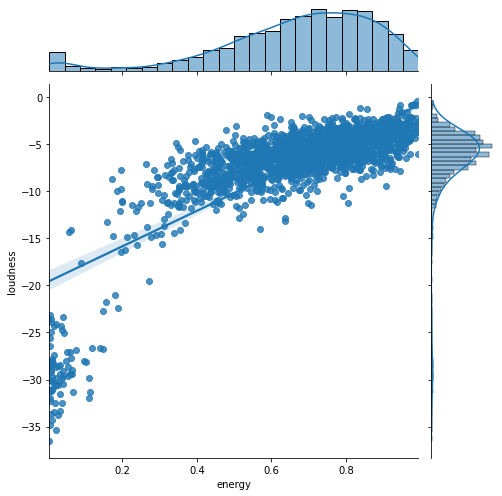

In [4]:
# code for visualization the outcome
sb.jointplot(x="energy", y="loudness", data=dfp, kind = 'reg',fit_reg= True, size = 7)
plt.show()

**4.2 Method 2**

#### Q: **What assumptions need to be verified at this step?**
#### A: We can predict popularity with some accuracy based on Spotify's track features.
#### Q: **What algorithm did you choose?**
#### A: Logistic Regression
#### Q: **Why you choose this algorithm?**
#### A: Classification (popularity: low, mid, high) Fit the regression curve to the training data. Get a model.
#### Q: **What metric can measure the quality of your algorithm?**
#### A: Accuracy on test set.
#### Q: **What is the outcome?**
#### A: 93% accuracy on a test size of 30% of the data.
#### Q: **Analysis and discussion:**
#### A: Logistic Regression is very accurate on the testing data and looks to be a good predictor of true popularity.

In [5]:
# code for modeling
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.model_selection import train_test_split

#X = df[['length','valence', 'danceability', 'energy']].copy()
X = df.drop(columns = ['popularity','release_date','fromAlbum','mode'])
y = pd.cut(df['popularity'], bins=[0, 20, 80, 100], include_lowest=True, labels=['low', 'mid', 'high'])
#y = pd.cut(df['popularity'], bins=[0, 33, 66, 100], include_lowest=True, labels=['low', 'mid', 'high'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
logreg = LogisticRegression(max_iter= 1000)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
# code for visualization the outcome
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.92


**4.3 Method 3**

#### Q: **What assumptions need to be verified at this step?**
#### A: Based on the correlation matrix we generated in phase2, we see there are five features ('loudness', 'valence', 'tempo', 'liveness', 'acousticness') show strong connetion with energy, we want to predict energy with those features using linear regrssion
#### Q: **What algorithm did you choose?**
#### A: Linear regression
#### Q: **Why you choose this algorithm?**
#### A: All features are numerical data and from the pair plot in phase2, we can see linear relation between energy and some features, therefore, linear regression should be suitable
#### Q: **What metric can measure the quality of your algorithm?**
#### A: Accuracy on test set
#### Q: **What is the outcome?**
#### A: 78% accuracy on test size of 30% data
#### Q: **Analysis and discussion:**
#### A: Although 78% is not a high accuracy, it is still a reasonable outcome since base on the correlation matrix from phase2, only 5 features show strong connection with energy. Therefore, linear regression is a doable a method for this dataset but it might not be the most sutiable method (we will see better accuracy with methods about classification) 

In [7]:
# code for modeling
import pandas
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
#energy prediction
df3 = df[df.popularity >= 60]

X = df3[['loudness', 'valence', 'tempo', 'liveness', 'acousticness']]
y = df3['energy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# code for visualization the outcome
y_pred = regr.predict(X_test)
print('Accuracy of linear regression classifier on test set: {:.2f}'.format(regr.score(X_test, y_test)))

Accuracy of linear regression classifier on test set: 0.78


In [9]:
X_test.head()

loudness  valence  tempo  liveness  acousticness
4917      -5.7    0.508    120     0.178       0.00463
3046      -5.3    0.960    170     0.296       0.18000
806       -6.0    0.631    136     0.180       0.14000
2731      -4.9    0.611     94     0.324       0.06650
3847      -5.5    0.447    124     0.101       0.10000

**4.4 Method 4**

#### Q: **What assumptions need to be verified at this step?**
#### A: We breify split popularity into 3 groups (low, mid, high), and we believe it is doable to predict popularity based on spolify's track features
#### Q: **What algorithm did you choose?**
#### A: Decision Tree Classification 
#### Q: **Why you choose this algorithm?**
#### A: Since what we doing is simply classification on numerial data, Decison Tree classifier can generate a model with good perfomance.
#### Q: **What metric can measure the quality of your algorithm?**
#### A: Accuracy on test dataset
#### Q: **What is the outcome?**
#### A: 86% accuracy on test size of 30% data
#### Q: **Analysis and discussion:**
#### A: The 86% accuracy from 30% test data shows enough evidences that Decision Tree Classifier provides a strong classification model in this dataset, which bring us to think if there is any other classification method can result in even higher accuracy score

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 

In [11]:
# code for modeling
X = df.drop(columns = ['popularity','release_date','fromAlbum','mode'])
y = pd.cut(df['popularity'], bins=[0, 20, 80, 100], include_lowest=True, labels=['low', 'mid', 'high'])
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [12]:
DecisionTreeClassifier = DecisionTreeClassifier()
DecisionTreeClassifier.fit(X_train, y_train)

y_pred = DecisionTreeClassifier.predict(x_test)

accuracy = metrics.accuracy_score(y_test, y_pred)

In [13]:
# code for visualization the outcome
print('Accuracy of DecisionTree classifier on test set: {:.2f}'.format(accuracy))

Accuracy of DecisionTree classifier on test set: 0.87


In [14]:
x_test.head()

length  valence  danceability  ...  speechiness   key  tempo
1843  240641    0.248         0.386  ...       0.1480  11.0    150
603   190185    0.337         0.674  ...       0.1220   7.0     85
659   255093    0.482         0.759  ...       0.0459   6.0    129
2835  226866    0.595         0.506  ...       0.0655  11.0    144
582   217706    0.352         0.728  ...       0.1340   1.0    100

[5 rows x 11 columns]

**4.5 Method 5**

#### Q: **What assumptions need to be verified at this step?**
#### A: We can predict popularity to some relevant bins with good accuracy.
#### Q: **What algorithm did you choose?**
#### A: KNearestNeighbor
#### Q: **Why you choose this algorithm?**
#### A: It will classify our tracks and provide a model for artists to use to classify their own tracks and predict commercial success.
#### Q: **What metric can measure the quality of your algorithm?**
#### A: Accuracy on the test data.
#### Q: **What is the outcome?**
#### A: Accuracy of 92% with K=3.
#### Q: **Analysis and discussion:**
#### A: When accounting for relevant numeric data, we can predict a range of popularity for a given track.

In [15]:
# code for modeling
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import train_test_split

d = df.drop(columns = ['release_date','fromAlbum','mode'])
train, test = train_test_split(d)

#print(len(d))
#print(len(train))
target = pd.cut(train['popularity'], bins=[0, 20, 80, 100], include_lowest=True, labels=['low', 'mid', 'high'])
train = train.drop(columns = ['popularity'])

testtarget = pd.cut(test['popularity'], bins=[0, 20, 80, 100], include_lowest=True, labels=['low', 'mid', 'high'])

#print(len(target))

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train, target)
  
x_new = test.drop(columns = ['popularity'])
prediction = kn.predict(x_new)
  
# code for visualization the outcome
print("Predicted target value: {}\n".format(prediction))
#print(test.popularity)
print("Test score: {:.2f}".format(kn.score(test.drop(columns = ['popularity']), testtarget)))

Predicted target value: ['mid' 'mid' 'mid' ... 'mid' 'mid' 'mid']

Test score: 0.94


**4.6 Method 6**

#### Q: **What assumptions need to be verified at this step?**
#### A: It is possible to predict popularity based on track features.
#### Q: **What algorithm did you choose?**
#### A: Support Vector Machine
#### Q: **Why you choose this algorithm?**
#### A: since we want to make a data classification on different popularity level, SVM can determine the optimal decision boundary between possible outputs (low, mid, high)
#### Q: **What metric can measure the quality of your algorithm?**
#### A: Accuracy on test data
#### Q: **What is the outcome?**
#### A: 88% accuracy on test size of 30% data
#### Q: **Analysis and discussion:**
#### A: although the 88% accuracy proves SVM is a suitable model for this databset, we still get many ways to improve this model. For example, the three popularity groups in current dataset are not equally distributed, which might cause some errors, and in future implementation, we should use larger dataset for more accurate results.

In [16]:
from sklearn import svm
df3 = df
X = df3.drop(columns = ['popularity','release_date','fromAlbum','mode'])
y = pd.cut(df3['popularity'], bins=[0, 20, 80, 100], include_lowest=True, labels=['low', 'mid', 'high'])
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)
classifier = svm.SVC(max_iter=50,gamma='auto')
classifier.fit(X_train, y_train)
y_predict = classifier.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [17]:
# code for visualization the outcome

from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))
print('Accuracy of SVM classifier on test set: {:.2f}'.format(classifier.score(x_test, y_test)))


              precision    recall  f1-score   support

        high       0.03      0.04      0.04        45
         low       0.02      0.01      0.01        79
         mid       0.93      0.94      0.93      1784

    accuracy                           0.88      1908
   macro avg       0.33      0.33      0.33      1908
weighted avg       0.87      0.88      0.88      1908

Accuracy of SVM classifier on test set: 0.88


#### 5 Each person contribution
(for example, person 1 implemented first algorithm and person 2 helped to analysis the first algorithm ....)

Mark implemented OLS, Logistic Regression, KNN and analyzed /refined the other models.

Xianxin implemented Linear Regression, Decision Tree and analyzed / refined the other models.



#### 6 Example

#### Q: What assumptions need to be verified at this step?
#### A: A Hospital Care chain wants to open a series of Emergency-Care wards within a region. We assume that the hospital knows the location of all the maximum accident-prone areas in the region. They have to decide the number of the Emergency Units to be opened and the location of these Emergency Units, so that all the accident-prone areas are covered in the vicinity of these Emergency Units. We want to help to decide the location of these Emergency Units so that the whole region is covered.
#### Q: What algorithm did you choose?
#### A: k-means
#### Q: Why you choose this algorithm?
#### A: After observing the data, we don't know how many locations there are, and we don't have labelled ground truth data. So we need a clustering algorithm. Kmeans clustering is one of the most popular clustering algorithms and usually the first thing practitioners apply when solving clustering tasks to get an idea of the structure of the dataset. Therefore, we choose k-means algorithm. **I already have completed PCA to map my data to 2 dimension for k-means algorithm.**
#### Q: What metric can measure the quality of your algorithm?
#### A: I would use Percentage of Variance Explained (PVE) to evaluate clustering algorithm.
#### Q: What is the outcome?
#### A: I divided my data into train dataset (contains 90% of data) and test dataset (contains 10% of data). I used the test data to evaluate the outcome of k-means algorithm. In the cluster-predict methodology, we can evaluate how well the models are performing based on different K clusters since clusters are used in the downstream modeling. I will use Elbow method and Silhouette analysis for evaluation.
+ Elbow method:
We use elbow method to check the k we choose.
The following figure shows the result: ...
+ Silhouette analysis: ...

#### Q: Analysis and discussion:
#### A: Accoridng the visualization of clustered data, we could conclude the location of these Emergency Units, which shows in the following image. ......

### Submission guideline:
1. write your code and report in this notebook. 
2. save this notebook as <person1ubname_person2ubname.ipynb>.
3. save your raw data in data folder.
4. save the notebook file with data folder in a folder named <person1ubname_person2ubname.zip>. 
5. upload your zip file to the ub learns.

**Each person from a team needs to make submissions.**

### Grading:
    0 – no submission by deadline;
    5 – complete 1 algorithm with complete analysis and discussion;
    10 – complete 2-3 algorithms with complete analysis and discussion;
    15 – complete 4 algorithms with complete analysis and discussion;
    20 - complete 5 algorithms with complete analysis and discussion, however, the report is the best when compared with other teams;
    25 - the whole process is prefect;
    
